<a href="https://colab.research.google.com/github/rilianx/ADA/blob/main/Gu%C3%ADas%20para%20Informes/mini-tutoriales/Grafos_con_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini tutorial: grafos con networkx

## Creemos un grafo

In [ ]:
import networkx as nx

G = nx.DiGraph()

# agregamos nodos con id y color
G.add_nodes_from([
    (1, {"color": "brown"}),
    (2, {"color": "green"}),
    (3, {"color": "blue"}),
    (4, {"color": "black"}),
])

# y agregamos arcos con pesos

G.add_edge(1,2,weight=1)
G.add_edge(1,3,weight=5)
G.add_edge(2,4,weight=2)
G.add_edge(3,4,weight=7)

## Imprimamos el grafo

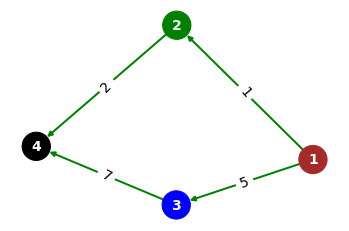

In [ ]:
import matplotlib.pyplot as plt

# La lista color_map alamacena los colores de cada nodo
color_map = []
for node in G:
  color_map.append(G.nodes[node]["color"])

# spring_layout: define posiciones para los nodos del grafo
pos=nx.spring_layout(G)

# para mostrar los arcos con sus etiquetas
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(G,pos, node_color=color_map, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")


### Sucesores

In [ ]:
list(G.successors(1))

[2, 3]

### Peso de un arco

In [ ]:
G[1][2]['weight']

1

# Ahora haremos una búsqueda en profundidad

Creamos el grafo

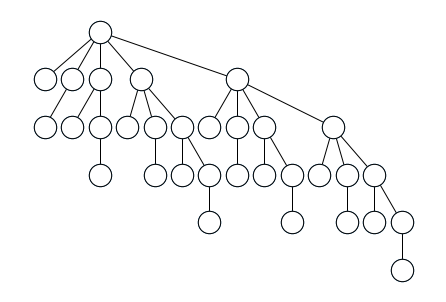

In [ ]:
import random  
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Creamos un árbol binomial de 5 niveles
T = nx.binomial_tree(5)

node_size = 500

# calcula las posiciones de los nodos (para que se vea bonito el árbol!)
pos = graphviz_layout(T, prog="dot")

# dibujamos el grafo/árbol
nx.draw(T,pos, with_labels=False, node_size=node_size)
nodes = nx.draw_networkx_nodes(T, pos,  node_size=node_size, node_color="white")
nodes.set_edgecolor('black')

### La búsqueda en profundidad (postorden)

In [ ]:
# Este algoritmo realiza un DFS iterativo y
# etiqueta los nodos en postorden
def dfs(T, initial=0):
   state = dict()
   for n in T: state[n]="no descubierto"

   Q=[initial]
   count = 1

   while len(Q)>0:
     n=Q.pop()
     if state[n]=="no descubierto": #primera pasada
       state[n]="descubierto"
       Q.append(n)
       for adj in reversed(list(T[n])):
         if state[adj]== "no descubierto": Q.append(adj)
     elif state[n]=="descubierto": #segunda pasada
       state[n] ="visitado"
       T.nodes[n]["label"]=str(count); count+=1

#Realizamos la búsqueda
dfs(T,0)

Y graficamos

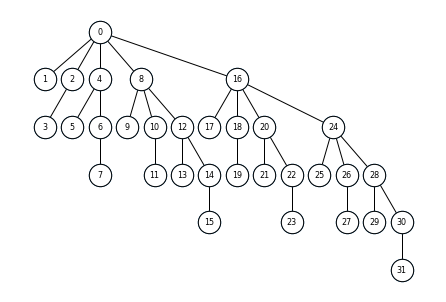

In [ ]:
# Guardamos en un diccionario (labels) las etiquetas de cada nodo
labels={}
for n in T:
   if "label" in T.nodes[n]: labels[n]=T.nodes[n]["label"]

# Cambiamos la etiqueta de los nodos
T_labeled = nx.relabel_nodes(T, labels, copy=True)

# calcula las posiciones de los nodos
pos = graphviz_layout(T_labeled, prog="dot")

# Dibujamos los nodos con sus nuevas etiquetas (etiquetas representan postorden)
nx.draw(T_labeled, pos, with_labels=True, node_size=node_size, font_color="black", font_size=8, width  =1.0)
nodes = nx.draw_networkx_nodes(T_labeled, pos,  node_size=node_size, node_color="white")
nodes.set_edgecolor('black')